In [1]:
import sys
from os.path import join, exists, abspath
from os import getcwd
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm, colors
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import scipy
import h5py
import seaborn as sns

from tqdm import tqdm

In [2]:
import nibabel as nb
from nilearn import plotting

In [3]:
dir_current = getcwd().replace('\\','/')

tmp = dir_current.split('/')
idx = [ii for ii, s in enumerate(tmp) if s=='github'][0]

dir_git = '/'.join(tmp[:idx+1])
dir_git

'/home/sungbeenpark/github'

In [4]:
dname = join(dir_git,'nitools')
sys.path.append(dname)
import nitools as nt

In [5]:
dname = join(dir_git,'SUITPy')
sys.path.append(dname)
import SUITPy as suit

In [6]:
dname = join(dir_git)
sys.path.append(dname)
import surfAnalysisPy as surf

In [7]:
dname = join(dir_git,'src')
sys.path.append(dname)
import rsatoolbox as rsa

In [8]:
dname = join(dir_git,'SeqSpatialSupp_fMRI')
sys.path.append(dname)
from SSS import deal_spm
from SSS import util as su
from SSS import plot as splt
from SSS import image as simage

---

## FreeSurfer

In [9]:
dir_atlas = join(dir_git,'SeqSpatialSupp_fMRI/atlas/fs_LR_32k')

1. ROI: general

In [10]:
list_roi = simage.get_list_roi()

In [11]:
border = simage.get_border(join(dir_git,'surfAnalysisPy'))

In [12]:
# underlay = simage.get_underlay(join(dir_git,'surfAnalysisPy'))

9 [0 1 2 3 4 5 6 7 8]


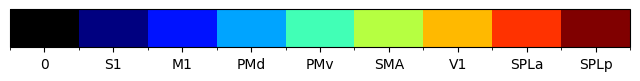

In [13]:
atlas = nb.load(join(dir_atlas,'ROI.32k.L.label.gii'))
tmp = np.unique(atlas.darrays[0].data)
print(len(tmp), tmp)

cmap= splt.cmap_for_cbar(list_roi, cm.jet)

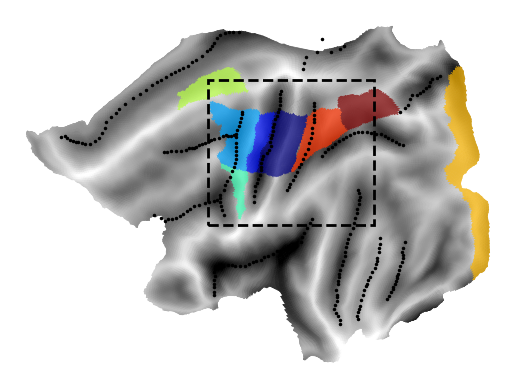

In [14]:
fig, ax = plt.subplots()

plt.sca(ax)
g = surf.plot.plotmap(
    data=atlas,
    surf='fs32k_L',
    alpha=0.7, cmap=cmap, colorbar=False,
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)
rect = patches.Rectangle(
    xy=(-40, -4), width=160, height=140,
    linewidth=2, edgecolor='k', facecolor='none', linestyle='--'
)
g.add_patch(rect)
# g.set_xlim(-40,120)
# g.set_ylim(65,66)

---

In [15]:
dir_surf = su.get_dir_surf()
hemi = 'L'

In [16]:
glm = 1
dir_work = join(dir_surf,'glm_%d'%glm)

In [17]:
vmin, vmax = -10, 10

In [24]:
subj = 'S01'
orders = np.genfromtxt(
    join(dir_work,'%s.con_orders.csv'%subj),
    delimiter='\t', dtype=str
)
orders

array(['con_(1,L).nii', 'con_(1,S).nii', 'con_(2,L).nii', 'con_(2,S).nii',
       'con_(3,L).nii', 'con_(3,S).nii', 'con_(4,L).nii', 'con_(4,S).nii',
       'con_Letter-Spatial.nii', 'con_Letter.nii', 'con_Spatial.nii'],
      dtype='<U22')

# Session S

In [19]:
fnames = glob(join(dir_work,'S*.%s.glm_%d.con.func.gii'%(hemi,glm)))
fnames

['/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S01.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S02.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S03.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S05.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S06.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S08.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S09.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S10.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S11.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S12.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S13.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S14.L.glm_1.con.func.gii']

In [20]:
dataset = []
for fname in fnames:
    gii = nb.load(fname)
    tmp = []
    for darray in gii.darrays:
        tmp.append(darray.data)
    dataset.append(tmp)
dataset = np.array(dataset)
# shape = (# of subjects, # of regressors, # of verteces)
dataset.shape

(12, 11, 32492)

### Letter

In [21]:
idx = 9
print(orders[idx])

data = np.mean(dataset[:,idx,:], axis=0)
print(data.shape)

t_vals, p_vals = scipy.stats.ttest_1samp(dataset[:,idx,:], popmean=0, axis=0)
print(t_vals.shape)

con_Letter.nii
(32492,)
(32492,)


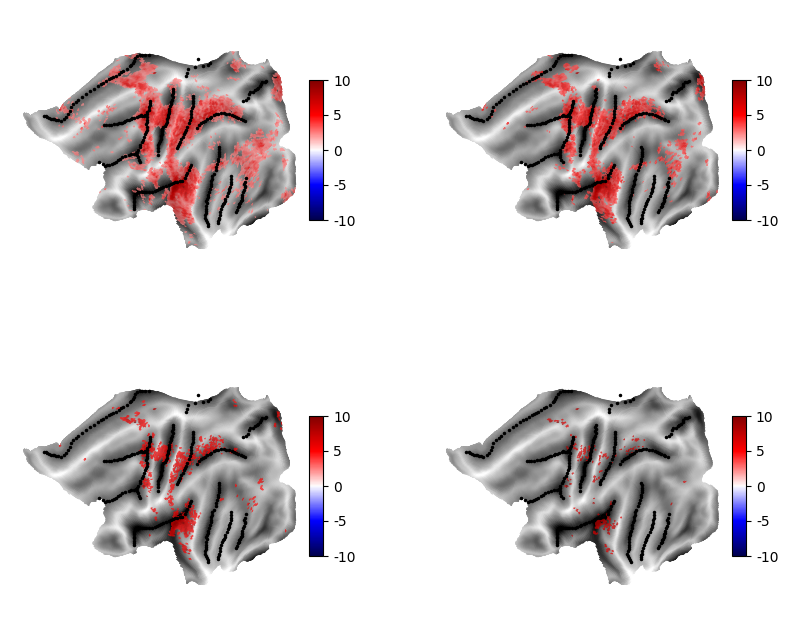

In [22]:
nrows, ncols = 2, 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols,4*nrows))
axs = np.concatenate(axs)

for ii, alpha in enumerate([0.05, 0.01, 0.001, 0.0001]):
    ax = axs[ii]
    thresh = scipy.stats.t.ppf(1-0.5*alpha,df=len(fnames)-1)

    plt.sca(ax)
    g = surf.plot.plotmap(
        # data=data,
        data=t_vals,
        surf='fs32k_%s'%hemi,
        underlay=underlay, alpha=0.7,
        cmap=cm.seismic, colorbar=True, cscale=[vmin,vmax], threshold=thresh,
        borders=border, bordercolor='black', bordersize=3,
        overlay_type='func', render='matplotlib'
    )

### Spatial

In [23]:
idx = 10
print(orders[idx])

data = np.mean(dataset[:,idx,:], axis=0)
print(data.shape)

t_vals, p_vals = scipy.stats.ttest_1samp(dataset[:,idx,:], popmean=0, axis=0)
print(t_vals.shape)

con_Spatial.nii
(32492,)
(32492,)


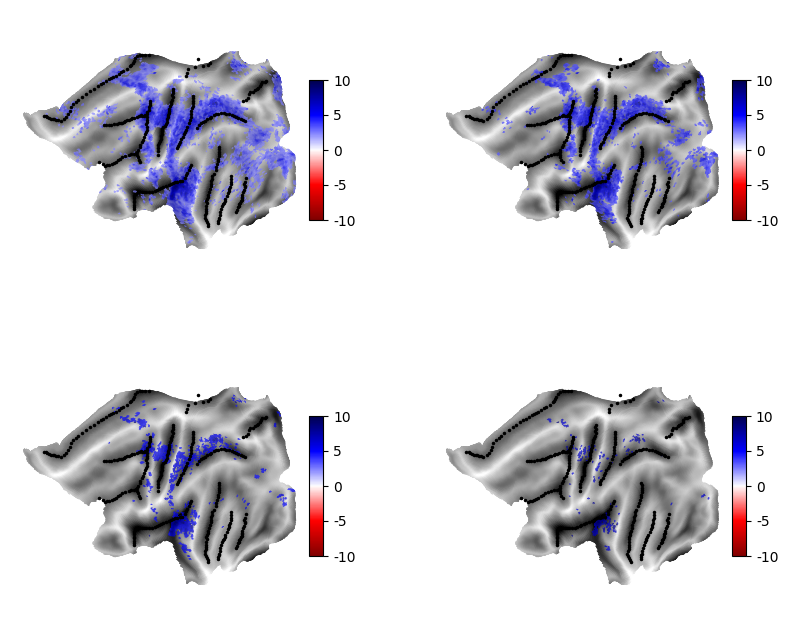

In [24]:
nrows, ncols = 2, 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols,4*nrows))
axs = np.concatenate(axs)

for ii, alpha in enumerate([0.05, 0.01, 0.001, 0.0001]):
    ax = axs[ii]
    thresh = scipy.stats.t.ppf(1-0.5*alpha,df=len(fnames)-1)

    plt.sca(ax)
    g = surf.plot.plotmap(
        # data=data,
        data=t_vals,
        surf='fs32k_%s'%hemi,
        underlay=underlay, alpha=0.7,
        cmap=cm.seismic_r, colorbar=True, cscale=[vmin,vmax], threshold=thresh,
        borders=border, bordercolor='black', bordersize=3,
        overlay_type='func', render='matplotlib'
    )

### Combine the two results

In [25]:
idx_letter = 9
print(orders[idx_letter])
idx_spatial = 10
print(orders[idx_spatial])

con_Letter.nii
con_Spatial.nii


In [26]:
fnames = glob(join(dir_work,'S*.%s.glm_%d.con.func.gii'%(hemi,glm)))
alpha = 0.001
thresh = scipy.stats.t.ppf(1-0.5*alpha,df=len(fnames)-1)
fnames

['/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S01.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S02.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S03.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S05.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S06.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S08.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S09.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S10.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S11.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S12.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S13.L.glm_1.con.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/S14.L.glm_1.con.func.gii']

In [27]:
dataset = []
for fname in fnames:
    gii = nb.load(fname)
    tmp = []
    for darray in gii.darrays:
        tmp.append(darray.data)
    dataset.append(tmp)
dataset = np.array(dataset)
# shape = (# of subjects, # of regressors, # of verteces)
dataset.shape

(12, 11, 32492)

In [28]:
data_letter = np.mean(dataset[:,idx_letter,:], axis=0)
tval_letter, _ = scipy.stats.ttest_1samp(dataset[:,idx_letter,:], popmean=0, axis=0)
print(data_letter.shape == tval_letter.shape)

data_spatial = np.mean(dataset[:,idx_spatial,:], axis=0)
tval_spatial, _ = scipy.stats.ttest_1samp(dataset[:,idx_spatial,:], popmean=0, axis=0)
print(data_spatial.shape == tval_spatial.shape)

True
True


In [29]:
data_letter[np.abs(tval_letter)<thresh] = np.nan
data_spatial[np.abs(tval_spatial)<thresh] = np.nan

(65.0, 66.0)

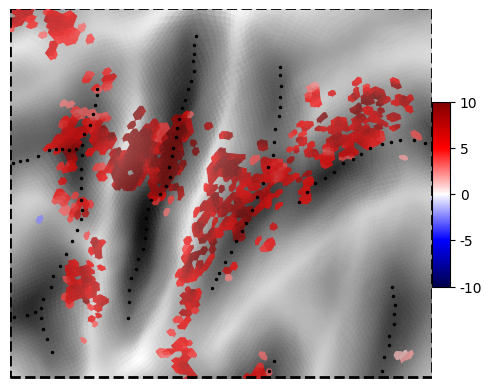

In [30]:
g = surf.plot.plotmap(
    data=data_letter,
    surf='fs32k_%s'%hemi,
    alpha=0.7,
    cmap=cm.seismic, colorbar=True, cscale=[vmin,vmax],
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)
rect = patches.Rectangle(
    xy=(-40, -4), width=160, height=140,
    linewidth=2, edgecolor='k', facecolor='none', linestyle='--'
)
g.add_patch(rect)
g.set_xlim(-40,120)
g.set_ylim(65,66)

(65.0, 66.0)

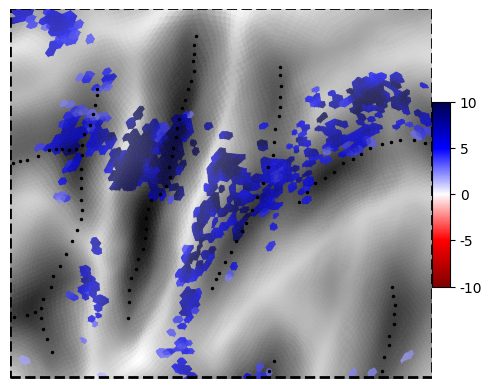

In [31]:
g = surf.plot.plotmap(
    data=data_spatial,
    surf='fs32k_%s'%hemi,
    alpha=0.7,
    cmap=cm.seismic_r, colorbar=True, cscale=[vmin,vmax],
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)
rect = patches.Rectangle(
    xy=(-40, -4), width=160, height=140,
    linewidth=2, edgecolor='k', facecolor='none', linestyle='--'
)
g.add_patch(rect)
g.set_xlim(-40,120)
g.set_ylim(65,66)

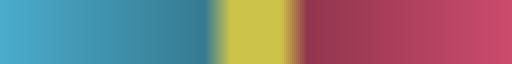

In [32]:
color = [
    (0, '#4BACCC'),
    (0.4, '#367B92'),
    (0.45, '#CCC34B'),
    (0.55, '#CCC34B'),
    (0.6, '#92364E'),
    (1, '#CC4B6D')
]
cmap = colors.LinearSegmentedColormap.from_list('custom_cmap', color)
cmap

In [33]:
data = np.ones(data_letter.shape) * np.nan
data[data_letter>0] = data_letter[data_letter>0]
data[data_spatial>0] = -data_spatial[data_spatial>0]
data[(data_letter>0)&(data_spatial>0)] = 0
data

array([nan, nan, nan, ..., nan, nan, nan])

(65.0, 66.0)

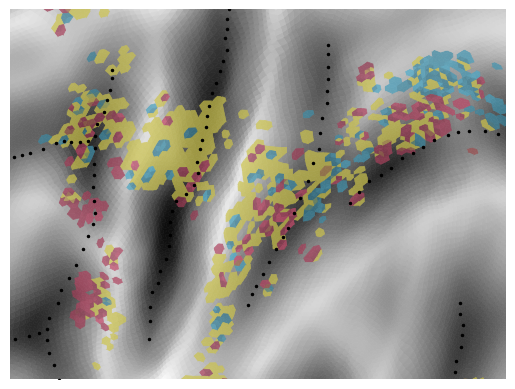

In [104]:
g = surf.plot.plotmap(
    data=data,
    surf='fs32k_%s'%hemi,
    alpha=0.7,
    cmap=cmap, colorbar=False, cscale=[vmin,vmax],
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)
# rect = patches.Rectangle(
#     xy=(-40, -4), width=160, height=140,
#     linewidth=2, edgecolor='k', facecolor='none', linestyle='--'
# )
# g.add_patch(rect)
g.set_xlim(-40,120)
g.set_ylim(65,66)

In [101]:
tmp = ['' for i in range(10)]
ticklabels = [
    '10',*tmp,'Spatial',*tmp,'%.2f'%(thresh),
    *['' for i in range(5)],'Overlap',*['' for i in range(5)],
    '%.2f'%(thresh),*tmp,'Letter',*tmp,'10'
]

In [102]:
N = len(ticklabels)
norm = colors.BoundaryNorm(boundaries=np.arange(0, N, 1), ncolors=cmap.N)

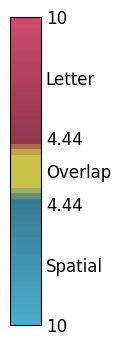

In [103]:
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig, ax = plt.subplots(figsize=(0.4,4))
cbar = fig.colorbar(sm, cax=ax, orientation='vertical', ticks=np.arange(len(ticklabels)))

cbar.ax.set_yticklabels(ticklabels, fontsize=12)
ax.tick_params(axis='y', which='both', length=0)

---

# Session R

In [107]:
idx_letter = 9
print(orders[idx_letter])
idx_spatial = 10
print(orders[idx_spatial])

con_Letter.nii
con_Spatial.nii


In [105]:
fnames = glob(join(dir_work,'R*.%s.glm_%d.t.func.gii'%(hemi,glm)))
fnames

['/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/R01.L.glm_1.t.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/R02.L.glm_1.t.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/R03.L.glm_1.t.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/R05.L.glm_1.t.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/R06.L.glm_1.t.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/R08.L.glm_1.t.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/R09.L.glm_1.t.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/R10.L.glm_1.t.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/R11.L.glm_1.t.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/R12.L.glm_1.t.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/R13.L.glm_1.t.func.gii',
 '/mnt/f/SeqSpatialSupp_fMRI/surfaceWB/glm_1/R14.L.glm_1.t.func.gii']

In [106]:
dataset = []
for fname in fnames:
    gii = nb.load(fname)
    tmp = []
    for darray in gii.darrays:
        tmp.append(darray.data)
    dataset.append(tmp)
dataset = np.array(dataset)
# shape = (# of subjects, # of regressors, # of verteces)
dataset.shape

(12, 11, 32492)

In [108]:
data_letter = np.mean(dataset[:,idx_letter,:], axis=0)
tval_letter, _ = scipy.stats.ttest_1samp(dataset[:,idx_letter,:], popmean=0, axis=0)
print(data_letter.shape == tval_letter.shape)

data_spatial = np.mean(dataset[:,idx_spatial,:], axis=0)
tval_spatial, _ = scipy.stats.ttest_1samp(dataset[:,idx_spatial,:], popmean=0, axis=0)
print(data_spatial.shape == tval_spatial.shape)

True
True


In [109]:
data_letter[np.abs(tval_letter)<thresh] = np.nan
data_spatial[np.abs(tval_spatial)<thresh] = np.nan

(65.0, 66.0)

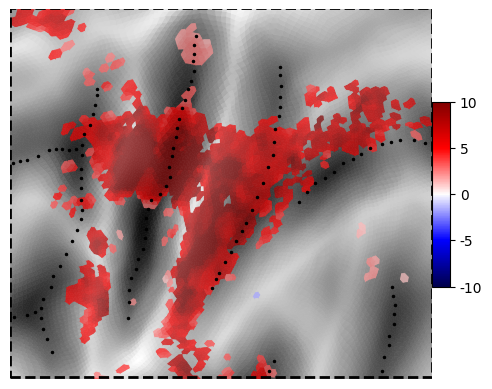

In [110]:
g = surf.plot.plotmap(
    data=data_letter,
    surf='fs32k_%s'%hemi,
    alpha=0.7,
    cmap=cm.seismic, colorbar=True, cscale=[vmin,vmax],
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)
rect = patches.Rectangle(
    xy=(-40, -4), width=160, height=140,
    linewidth=2, edgecolor='k', facecolor='none', linestyle='--'
)
g.add_patch(rect)
g.set_xlim(-40,120)
g.set_ylim(65,66)

(65.0, 66.0)

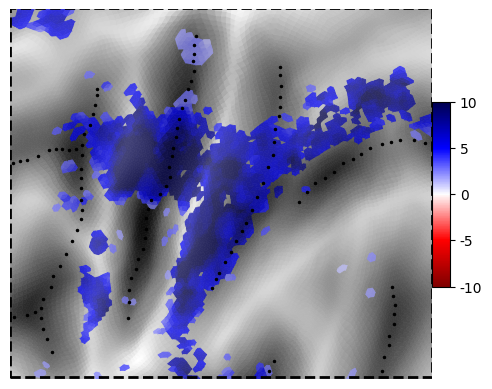

In [111]:
g = surf.plot.plotmap(
    data=data_spatial,
    surf='fs32k_%s'%hemi,
    alpha=0.7,
    cmap=cm.seismic_r, colorbar=True, cscale=[vmin,vmax],
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)
rect = patches.Rectangle(
    xy=(-40, -4), width=160, height=140,
    linewidth=2, edgecolor='k', facecolor='none', linestyle='--'
)
g.add_patch(rect)
g.set_xlim(-40,120)
g.set_ylim(65,66)

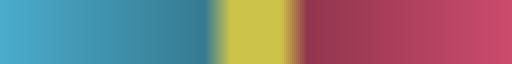

In [112]:
color = [
    (0, '#4BACCC'),
    (0.4, '#367B92'),
    (0.45, '#CCC34B'),
    (0.55, '#CCC34B'),
    (0.6, '#92364E'),
    (1, '#CC4B6D')
]
cmap = colors.LinearSegmentedColormap.from_list('custom_cmap', color)
cmap

In [113]:
data = np.ones(data_letter.shape) * np.nan
data[data_letter>0] = data_letter[data_letter>0]
data[data_spatial>0] = -data_spatial[data_spatial>0]
data[(data_letter>0)&(data_spatial>0)] = 0
data

array([ 0., nan,  0., ..., nan, nan, nan])

(65.0, 66.0)

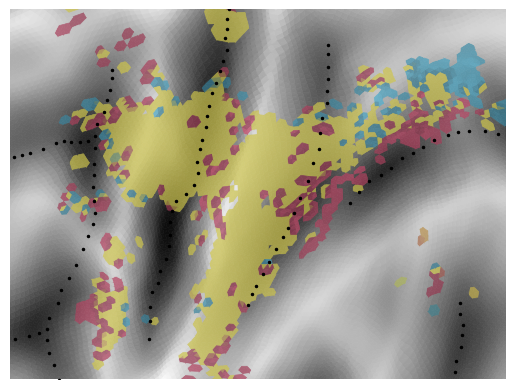

In [114]:
g = surf.plot.plotmap(
    data=data,
    surf='fs32k_%s'%hemi,
    alpha=0.7,
    cmap=cmap, colorbar=False, cscale=[vmin,vmax],
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)
# rect = patches.Rectangle(
#     xy=(-40, -4), width=160, height=140,
#     linewidth=2, edgecolor='k', facecolor='none', linestyle='--'
# )
# g.add_patch(rect)
g.set_xlim(-40,120)
g.set_ylim(65,66)

In [115]:
tmp = ['' for i in range(10)]
ticklabels = [
    '10',*tmp,'Spatial',*tmp,'%.2f'%(thresh),
    *['' for i in range(5)],'Overlap',*['' for i in range(5)],
    '%.2f'%(thresh),*tmp,'Letter',*tmp,'10'
]

In [116]:
N = len(ticklabels)
norm = colors.BoundaryNorm(boundaries=np.arange(0, N, 1), ncolors=cmap.N)

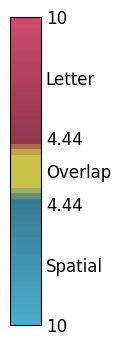

In [117]:
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig, ax = plt.subplots(figsize=(0.4,4))
cbar = fig.colorbar(sm, cax=ax, orientation='vertical', ticks=np.arange(len(ticklabels)))

cbar.ax.set_yticklabels(ticklabels, fontsize=12)
ax.tick_params(axis='y', which='both', length=0)

---